In [ ]:
import sklearn
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')



Data exploration


In [ ]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")
solexample = pd.read_csv("solution_format.csv")
trainlabels = traindf['labels']
traindata = traindf.iloc[:, 1:]

In [ ]:
solexample

In [ ]:
traindata

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,-0.128052,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,-1.656990,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,0.848524,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,0.717341,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,0.778445,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,0.261597,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,1.243559,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,0.053378,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,0.725914,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [ ]:
traindf

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,0,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,1,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,1,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [ ]:
traindf.mean()


labels    0.266667
f_0       0.385453
f_1       0.086769
f_2       0.317084
f_3       0.400414
            ...   
f_1195   -0.156475
f_1196   -0.096026
f_1197    0.372260
f_1198   -0.222551
f_1199    0.006532
Length: 1201, dtype: float64

In [ ]:
#add flipped data

flipped_df = traindf.iloc[:, 0:1].join(traindf.iloc[:, 1:][::-1])

aug_df = pd.concat([traindf, flipped_df], axis=0)


In [ ]:

X = traindata
y = trainlabels
ay = aug_df['labels']
aX = aug_df.iloc[:, 1:]


# X = traindata.iloc[:, importantfeatures]
# y = trainlabels
# ay = aug_df['labels']
# aX = aug_df.iloc[:, 1:]
# aX = aX.iloc[:, importantfeatures]

# Split the dataset into training and test sets
aX_train, aX_test, ay_train, ay_test = train_test_split(aX, ay, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train

Testing Classical methods

In [ ]:
aX.columns

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_6', 'f_7', 'f_8', 'f_9', 'f_11',
       ...
       'f_1182', 'f_1183', 'f_1186', 'f_1187', 'f_1191', 'f_1192', 'f_1193',
       'f_1194', 'f_1196', 'f_1197'],
      dtype='object', length=717)

In [ ]:
sub

,id,f_0,f_1,f_2,f_3,f_5,f_6,f_7,f_8,f_10,...,f_1181,f_1182,f_1185,f_1186,f_1190,f_1191,f_1192,f_1193,f_1195,f_1196
0,1,-3.388242,0.868285,-0.427619,-0.678964,0.262761,1.243040,1.537751,-0.352028,-1.485896,...,0.752675,-1.077703,1.431924,-0.013587,-0.776403,-0.662884,-0.257091,-1.168413,-0.482520,-0.085453
1,2,-0.496920,0.952381,0.989040,0.451422,-0.099658,-1.124326,0.729430,-0.216224,0.505176,...,-1.298254,0.100701,0.605404,0.065069,0.379635,-1.760084,1.125450,-0.328047,-1.257607,0.964312
2,3,1.128369,-0.537951,2.544358,1.165254,0.776961,-0.495768,0.060111,-1.418468,0.224159,...,-1.403457,-2.438368,0.089148,-0.205051,1.165254,-1.373589,-0.483701,-0.964782,0.066040,-0.444567
3,4,0.051253,1.746814,0.681177,1.844524,1.226839,-0.085519,0.379008,-1.003667,-0.391189,...,0.137612,0.362197,-0.637794,0.524736,-0.442288,-2.794472,-0.763468,-0.789832,-2.703150,-2.058728
4,5,1.423209,-0.983594,-1.694170,1.197507,0.518777,-0.298612,-0.365174,0.738447,-0.019973,...,-0.904386,-0.383635,-1.709187,-0.296326,-2.624450,-3.200223,0.711422,-0.190394,-1.656639,0.707360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,0.889888,-0.319077,0.849589,0.822723,0.325704,0.876455,-0.910127,0.889888,-0.574303,...,-0.493706,0.836156,-1.272816,0.016746,0.889888,-2.226556,-0.090717,-1.393713,-0.399675,-0.856395
2246,2247,1.005737,-0.064755,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,-1.101443,...,-0.729587,1.129689,-1.619786,0.757833,1.163494,-1.270468,-0.932417,-1.169053,-0.605636,-0.323927
2247,2248,1.252086,1.223561,0.153859,-0.987156,-0.003031,-1.158309,1.237823,-1.272410,-1.029945,...,-0.031556,-1.429300,-0.245497,1.009620,0.581740,-1.386512,0.809943,-1.243885,-0.630589,1.594391
2248,2249,1.042624,-0.129166,1.066538,1.030667,0.707827,-1.396612,0.014319,-1.025944,-0.224822,...,-1.205300,0.970882,-0.404178,0.588257,1.078495,-1.193343,0.086061,-0.081338,-0.368307,-0.129166


In [ ]:
aX = aug_df.iloc[:, 1:]
y  = aug_df['labels']

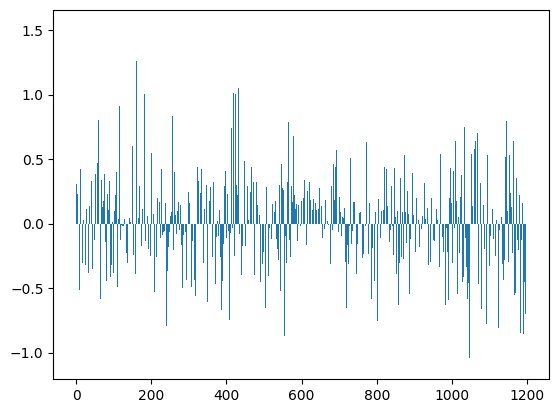

In [ ]:
#create feature importance using LR
LRmodel = LogisticRegression()

LRmodel.fit(aX, y)

# get importance
importance = LRmodel.coef_[0]
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# y_pred = LRmodel.predict(X_test)
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)  # For classification tasks
# print(accuracy)

In [ ]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

Text(0.5, 0, 'Feature Importance')

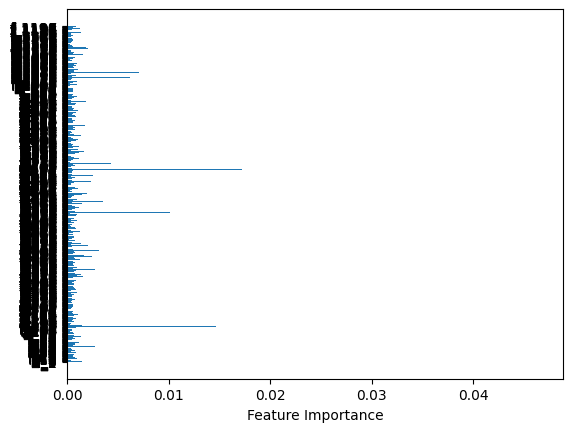

In [ ]:
sort = rf.feature_importances_.argsort()

pyplot.barh(X.columns, rf.feature_importances_)
pyplot.xlabel("Feature Importance")

In [ ]:
importantfeatures = []
reallyimportantfeatures = []
for i,v in enumerate(importance):
    if v >= .1 or v <= -0.1:
        # print('Feature: %0d, Score: %.5f' % (i,v))
        importantfeatures.append(i)
    if v >= .2 or v <= -0.2:
      # print('Feature: %0d, Score: %.5f' % (i,v))
        reallyimportantfeatures.append(i)

# reducedaX = aX.iloc[:, importantfeatures]
# reducedaX = aX.iloc[:, importantfeatures]




In [ ]:
# xgbClassifier.predict()
testdf['labels'] = xgbClassifier.predict(testdf.iloc[:, 1:])

In [ ]:
submission = testdf[['id', 'labels']]
submission.to_csv("xgboost_waug.csv", index=False)

In [ ]:

# Define the XGBoost model
xgbClassifier = xgb.XGBClassifier()  # For classification tasks
# model = xgb.XGBRegressor()  # For regression tasks

# Train the model
xgbClassifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgbClassifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # For classification tasks
# mse = mean_squared_error(y_test, y_pred)  # For regression tasks

# Print the evaluation result
print("Accuracy:", accuracy)

Accuracy: 0.8714285714285714


In [ ]:
for i in range(5,15):
  for a in ['auto', 'ball_tree', 'kd_tree', 'brute']:
    knnClassifier = KNeighborsClassifier(n_neighbors=i, algorithm=a)
    knnClassifier.fit(aX_train, ay_train)
    y_pred = knnClassifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(a, " with n :", i, " ", accuracy)

In [ ]:
aug_df

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,0,-2.033875,0.978446,-0.142131,-0.177117,-1.470684,1.669562,-0.196530,-0.125239,-0.452284,...,-1.111266,0.716084,0.060039,0.301279,-1.174846,-1.076498,-0.069452,-0.604012,-2.179176,0.558003
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
3,0,1.223321,-0.479048,-1.925789,1.680377,0.021840,-1.453307,0.605559,-0.019024,1.065448,...,0.360237,-1.957863,-0.123384,1.505329,0.660290,-1.769443,-0.547756,-0.568122,0.244645,0.982116
4,0,0.160109,0.422684,-0.308029,0.227744,0.432854,0.608348,0.193832,1.035091,-0.538868,...,0.416629,1.441766,0.212572,-0.994721,1.143999,-2.166923,-1.199248,-1.028636,0.752791,0.317169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0,1.157565,-0.142219,1.043992,1.144946,1.195423,0.248978,-1.505100,-0.874137,-1.782724,...,1.195423,-0.255793,-0.154838,0.413029,-0.482939,-1.277953,-0.445082,1.195423,-0.924614,-0.432462
5246,0,1.424709,0.235910,1.356778,1.368099,-0.318862,1.039765,-0.986854,-0.330184,-1.383120,...,1.424709,-1.066107,0.881258,-0.488691,-1.281223,-1.213291,0.122692,1.175627,-1.145360,0.451026
5247,1,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,1,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [ ]:
knnClassifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
knnClassifier.fit(aX_train, ay_train)


KNeighborsClassifier()

In [ ]:
sub

,id,f_0,f_1,f_2,f_3,f_5,f_6,f_7,f_8,f_10,...,f_1181,f_1182,f_1185,f_1186,f_1190,f_1191,f_1192,f_1193,f_1195,f_1196
0,1,-3.388242,0.868285,-0.427619,-0.678964,0.262761,1.243040,1.537751,-0.352028,-1.485896,...,0.752675,-1.077703,1.431924,-0.013587,-0.776403,-0.662884,-0.257091,-1.168413,-0.482520,-0.085453
1,2,-0.496920,0.952381,0.989040,0.451422,-0.099658,-1.124326,0.729430,-0.216224,0.505176,...,-1.298254,0.100701,0.605404,0.065069,0.379635,-1.760084,1.125450,-0.328047,-1.257607,0.964312
2,3,1.128369,-0.537951,2.544358,1.165254,0.776961,-0.495768,0.060111,-1.418468,0.224159,...,-1.403457,-2.438368,0.089148,-0.205051,1.165254,-1.373589,-0.483701,-0.964782,0.066040,-0.444567
3,4,0.051253,1.746814,0.681177,1.844524,1.226839,-0.085519,0.379008,-1.003667,-0.391189,...,0.137612,0.362197,-0.637794,0.524736,-0.442288,-2.794472,-0.763468,-0.789832,-2.703150,-2.058728
4,5,1.423209,-0.983594,-1.694170,1.197507,0.518777,-0.298612,-0.365174,0.738447,-0.019973,...,-0.904386,-0.383635,-1.709187,-0.296326,-2.624450,-3.200223,0.711422,-0.190394,-1.656639,0.707360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,0.889888,-0.319077,0.849589,0.822723,0.325704,0.876455,-0.910127,0.889888,-0.574303,...,-0.493706,0.836156,-1.272816,0.016746,0.889888,-2.226556,-0.090717,-1.393713,-0.399675,-0.856395
2246,2247,1.005737,-0.064755,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,-1.101443,...,-0.729587,1.129689,-1.619786,0.757833,1.163494,-1.270468,-0.932417,-1.169053,-0.605636,-0.323927
2247,2248,1.252086,1.223561,0.153859,-0.987156,-0.003031,-1.158309,1.237823,-1.272410,-1.029945,...,-0.031556,-1.429300,-0.245497,1.009620,0.581740,-1.386512,0.809943,-1.243885,-0.630589,1.594391
2248,2249,1.042624,-0.129166,1.066538,1.030667,0.707827,-1.396612,0.014319,-1.025944,-0.224822,...,-1.205300,0.970882,-0.404178,0.588257,1.078495,-1.193343,0.086061,-0.081338,-0.368307,-0.129166


In [ ]:
sub = testdf.iloc[:, 1:]
sub = sub.iloc[:, importantfeatures]
testdf['labels'] = knnClassifier.predict(sub)


In [ ]:
submission = testdf[['id', 'labels']]

In [ ]:
submission.to_csv('5n_knn_waugs_importance0.1.csv', index=False)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
  SVClassifier = SVC(kernel=k)
  SVClassifier.fit(X_train, y_train)
  y_pred = SVClassifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)

0.7704761904761904
0.8466666666666667
0.8476190476190476
0.8466666666666667


In [ ]:
crit = ['gini', 'entropy', 'log_loss']
for c in crit:
  dtclass = DecisionTreeClassifier(criterion=c)
  dtclass.fit(X_train, y_train)
  y_pred = dtclass.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(c, " ", accuracy)

0.7647619047619048
0.758095238095238
0.7647619047619048


In [ ]:


# split the dataset into train and test datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# define the base models
level0 = list()
# level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier(n_neighbors =8)))
# level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('xgb', xgb.XGBClassifier()))

# define meta learner model
level1 = RandomForestClassifier()

# define the stacking ensemble
ensemble = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
ensemble.fit(X_train, y_train)

# make a prediction for one instance
y_pred = ensemble.predict(X_test)

# evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))

ValueError: ignored

In [ ]:
testdf
testdata = testdf.iloc[:, 1:]


In [ ]:
testdata

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [ ]:
testdata

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [ ]:
knnClassifier = KNeighborsClassifier(n_neighbors=8)
knnClassifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

In [ ]:
testdata['classification'] = testdata.apply(lambda x: knnClassifier.predict(np.array(x).reshape(1,-1))[0],axis=1)

NameError: ignored

In [ ]:
testdata['id'] = testdf['id']
testdata

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199,id
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404,1
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029,2
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488,3
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825,4
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0.812448,-0.887585,-1.720241,0.037756,-0.027353,0.455336,-0.147746,0.374871,0.806206,0.469159,...,2.087044,-0.281406,0.854356,0.350275,-0.784948,-2.347357,-1.066917,1.159733,-1.065897,798
798,-0.230829,1.587434,-0.071908,-0.364252,-0.875762,-1.123044,-0.356475,-0.889185,-0.547437,-2.716407,...,0.270115,-0.536932,0.556702,-1.732274,0.839805,1.518645,0.303668,0.924748,0.250863,799
799,3.175862,0.427759,1.490084,1.494840,-0.162264,0.995142,-1.482904,0.105556,2.473965,2.102029,...,-0.902026,0.370415,-1.169859,0.381954,1.242291,-0.889109,0.788108,0.474568,0.628787,800
800,0.704484,-1.842615,0.675625,-0.275646,0.552615,1.390984,-1.252065,0.998914,1.702821,0.090807,...,-0.554158,-0.502601,0.142170,1.494715,0.560818,2.047255,-0.344430,-0.925758,2.174152,801


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers



In [ ]:
from tensorflow.keras.callbacks import Callback

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs=None):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print(f'\nTesting loss: {loss}, acc: {acc}\n')

class ValidationCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs.get('val_loss')
        val_acc = logs.get('val_acc')
        print(f'\nValidation loss: {val_loss}, Validation Accuracy: {val_acc}\n')

In [ ]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")
solexample = pd.read_csv("solution_format.csv")

In [ ]:
# X = traindata
# y = trainlabels
# ay = aug_df['labels']
# aX = aug_df.iloc[:, 1:]
flipped_df = traindf.iloc[:, 0:1].join(traindf.iloc[:, 1:][::-1])

# Concatenate the original and flipped DataFrames
aug_df = pd.concat([traindf, flipped_df], axis=0)

X = aug_df.iloc[:, 1:]
y = aug_df['labels']
ay = aug_df['labels']
aX = aug_df.iloc[:, 1:]
aX = aX.iloc[:, importantfeatures]


rX = traindata.iloc[:, reallyimportantfeatures]
ry = trainlabels
ray = aug_df['labels']
raX = aug_df.iloc[:, 1:]
raX = raX.iloc[:, reallyimportantfeatures]

# Split the dataset into training and test sets
aX_train, aX_test, ay_train, ay_test = train_test_split(aX, ay, test_size=0.2, random_state=42)
raX_train, raX_test, ray_train, ray_test = train_test_split(raX, ray, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# X_train

In [ ]:
oX = traindata
oy = trainlabels
oX_train, oX_test, oy_train, oy_test = train_test_split(oX, oy, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB



In [ ]:
# Define the classifiers and their respective parameter grids
classifiers = {
    # 'GaussianNB': GaussianNB(),
    # 'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

param_grids = {
    # 'GaussianNB': {'var_smoothing': np.logspace(-10, -8, 10)},
    # 'MultinomialNB': {'alpha': np.linspace(0.5, 1.5, 6)},
    'BernoulliNB': {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False],}
    # 'class_prior': [None, [0.3, 0.7]]}
}

# Perform grid search for each type of Naive Bayes classifier
# for data in [(aX_train,aY_train), (raX_train,aX_train), (X_train,aX_train)]:
for classifier_name, classifier in classifiers.items():
    scaler = StandardScaler()
    scaler.fit(aX_train)
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[classifier_name], cv=5, scoring='accuracy')
    grid_search.fit(scaler.transform(aX_train), ay_train)

    # Print results for the current classifier
    print(f"Results for {classifier_name}:")
    print("Best Parameters: ", grid_search.best_params_)
    print("Test set accuracy: ", grid_search.score(aX_train, ay_train))
    print()


for classifier_name, classifier in classifiers.items():
    scaler = StandardScaler()
    scaler.fit(raX_train)
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[classifier_name], cv=5, scoring='accuracy')
    grid_search.fit(scaler.transform(raX_train), ray_train)

    # Print results for the current classifier
    print(f"Results for {classifier_name}:")
    print("Best Parameters: ", grid_search.best_params_)
    print("Test set accuracy: ", grid_search.score(raX_train, ray_train))
    print()


for classifier_name, classifier in classifiers.items():
    scaler = StandardScaler()
    scaler.fit(X_train)
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[classifier_name], cv=5, scoring='accuracy')
    grid_search.fit(scaler.transform(X_train), y_train)

    # Print results for the current classifier
    print(f"Results for {classifier_name}:")
    print("Best Parameters: ", grid_search.best_params_)
    print("Test set accuracy: ", grid_search.score(X_test, y_test))
    print()

Results for BernoulliNB:
Best Parameters:  {'alpha': 0.1, 'binarize': 1.0, 'fit_prior': True}
Test set accuracy:  0.8532142857142857

Results for BernoulliNB:
Best Parameters:  {'alpha': 0.5, 'binarize': 1.0, 'fit_prior': True}
Test set accuracy:  0.8508333333333333

Results for BernoulliNB:
Best Parameters:  {'alpha': 0.1, 'binarize': 1.0, 'fit_prior': True}
Test set accuracy:  0.8652380952380953



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid

# Define the classifiers and their respective parameter grids
classifiers = {
    'KNN': KNeighborsClassifier(),
    # 'RadiusNeighbors': RadiusNeighborsClassifier(),
    # 'NearestCentroid': NearestCentroid()
}

param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2], 'metric': ['euclidean', 'manhattan']}
    # 'RadiusNeighbors': {'radius': [0.5, 1.0, 1.5], 'weights': ['uniform', 'distance']},
    # 'NearestCentroid': {'shrink_threshold': [0.1, 0.5, 1.0]}
}


In [ ]:

# Perform grid search for each type of nearest neighbors classifier
for classifier_name, classifier in classifiers.items():
    scaler = StandardScaler()
    # scaler.fit(raX_train)
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[classifier_name], cv=5, scoring='accuracy')
    grid_search.fit((raX_train), ray_train)

    # Print results for the current classifier
    print(f"Results for {classifier_name}:")
    print("Best Parameters: ", grid_search.best_params_)
    print("Test set accuracy: ", grid_search.score(raX_test, ray_test))
    print()

for classifier_name, classifier in classifiers.items():
    scaler = StandardScaler()
    scaler.fit(aX_train)
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[classifier_name], cv=5, scoring='accuracy')
    grid_search.fit((aX_test), ay_test)

    # Print results for the current classifier
    print(f"Results for {classifier_name}:")
    print("Best Parameters: ", grid_search.best_params_)
    print("Test set accuracy: ", grid_search.score(aX_test, ay_test))
    print()


for classifier_name, classifier in classifiers.items():
    scaler = StandardScaler()
    scaler.fit(X_train)
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[classifier_name], cv=5, scoring='accuracy')
    grid_search.fit((X_train), y_train)

    # Print results for the current classifier
    print(f"Results for {classifier_name}:")
    print("Best Parameters: ", grid_search.best_params_)
    print("Test set accuracy: ", grid_search.score(X_test, y_test))
    print()

Results for KNN:
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Test set accuracy:  0.9742857142857143

Results for KNN:
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Test set accuracy:  1.0

Results for KNN:
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Test set accuracy:  0.9676190476190476



In [ ]:
sub = testdf.iloc[:, 1:]
sub1 = sub.iloc[:, importantfeatures]
sub2 = sub.iloc[:, reallyimportantfeatures]

In [ ]:
KNNbest = KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1, weights='distance')

In [ ]:
KNNbest.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1, weights='distance')

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
NBbest = BernoulliNB(alpha=0.1, binarize=1, fit_prior=True)
NBbest.fit(scaler.transform(X_train), y_train)

BernoulliNB(alpha=0.1, binarize=1)

In [ ]:
testdf['labels'] = KNNbest.predict(sub)

In [ ]:
submission = testdf[['id', 'labels']]

submission.to_csv("KNN_gridsearch_og.csv",index=False)

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)




KeyboardInterrupt: ignored

In [ ]:
#gridsearching XGBOOST FOR BEST

xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'learning_rate': [0.05],
    'max_depth': [6, 12],
}


grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
# Define GridSearchCV object

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best estimator and make predictions
best_xgboost_model = grid_search.best_estimator_
predictions = best_xgboost_model.predict(X_test)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, predictions))
# for classifier_name, classifier in classifiers.items():



Best parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 150}
Accuracy: 0.9761904761904762


In [ ]:
#test Stacking
meta_model = KNeighborsClassifier()

stacking_classifier = StackingClassifier(
    estimators=[
        ('xgboost', XGBClassifier()),
        ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1, weights='distance')),
        ('bernoulliNB', GaussianNB())
    ],
    final_estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1, weights='distance')
)

In [ ]:
stacking_classifier.fit(X_train, y_train)


StackingClassifier(estimators=[('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learn...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('knn',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=7, p=1,
                                                     weights='distance')),
                               ('bernoulliNB', GaussianNB())],
                   final_estimator=KNeighborsClassifier(metric='manhattan',
                                                        n_neighbors=7, p=1,
                                                        weights='distance'))

In [ ]:
testdf['labels'] = stacking_classifier.predict(sub)

In [ ]:
submission = testdf[['id', 'labels']]

submission.to_csv("stacked3.csv",index=False)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
testknn=KNeighborsClassifier(n_neighbors=12, weights='uniform', p=1, algorithm='auto', metric='manhattan')
testxgb=XGBClassifier()
# testnb=GaussianNB()
testbnb = BernoulliNB(alpha=0.1, binarize=1.0, fit_prior=True)
testada=AdaBoostClassifier()

In [ ]:
stacking_ensemble = StackingClassifier(
  estimators= [
    ('knn', testknn), ('nb', testbnb), ('xgb', testxgb)]
    # ('adaboost', adaboost_pipeline),
    # ('gradient', gradient_pipeline)]
    , final_estimator=testknn
)
stacking_ensemble.fit (X_train, y_train)
accuracy = stacking_ensemble.score(X_test, y_test)
print ("Accuracy (Stacking Ensemble - KNN, Naive Bayes, XGB):", accuracy)

Accuracy (Stacking Ensemble - KNN, Naive Bayes, XGB): 0.9809523809523809


In [ ]:
stacking_ensemble = StackingClassifier(
  estimators= [
    ('knn', testknn), ('nb', testbnb), ('xgb', testxgb)]
    # ('adaboost', adaboost_pipeline),
    # ('gradient', gradient_pipeline)]
    , final_estimator=testbnb
)
stacking_ensemble.fit (X_train, y_train)
accuracy = stacking_ensemble.score(X_test, y_test)
print ("Accuracy (Stacking Ensemble - KNN, Naive Bayes, XGB):", accuracy)

Accuracy (Stacking Ensemble - KNN, Naive Bayes, XGB): 0.7533333333333333


In [ ]:
stacking_ensemble = StackingClassifier(
  estimators= [
    ('knn', testknn), ('nb', testbnb), ('xgb', testxgb)]
    # ('adaboost', adaboost_pipeline),
    # ('gradient', gradient_pipeline)]
    , final_estimator=testxgb
)
stacking_ensemble.fit (X_train, y_train)
accuracy = stacking_ensemble.score(X_test, y_test)
print ("Accuracy (Stacking Ensemble - KNN, Naive Bayes, XGB):", accuracy)

Accuracy (Stacking Ensemble - KNN, Naive Bayes, XGB): 0.9776190476190476


In [ ]:
testdf['labels'] = stacking_ensemble.predict(sub)

KeyboardInterrupt: ignored

In [ ]:
submission = testdf[['id', 'labels']]

submission.to_csv("stacked5_friendver.csv",index=False)

# New Section

In [ ]:
for classifier_name, classifier in classifiers.items():
    scaler = StandardScaler()
    scaler.fit(aX_train)
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[classifier_name], cv=5, scoring='accuracy')
    grid_search.fit(scaler.transform(aX_train), ay_train)

    # Print results for the current classifier
    print(f"Results for {classifier_name}:")
    print("Best Parameters: ", grid_search.best_params_)
    print("Test set accuracy: ", grid_search.score(aX_test, ay_test))
    print()


Results for KNN:
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Test set accuracy:  0.8557142857142858



In [ ]:
    knnClassifier = KNeighborsClassifier(n_neighbors=7, metric='manhattan', p=1, weights='distance')
    knnClassifier.fit(aX_train, ay_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1, weights='distance')

In [ ]:
knnClassifier.predict(aX_test,)

In [ ]:
# high importance prediction

amodel = Sequential()

# Add layers to the model
amodel.add(Dense(64, activation='relu', input_shape=(raX_train.shape[1],), kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
amodel.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
                #activity_regularizer=regularizers.l1(0.01)))
amodel.add(Dense(1, activation='sigmoid'))  # Binary classification => sigmoid activation function

# Compile the model
amodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
amodel.fit(raX_train, ray_train, epochs=15, batch_size=32, callbacks=[TestCallback((raX_test, ray_test))])

Epoch 1/15
252/263 [===========================>..] - ETA: 0s - loss: 1.3579 - accuracy: 0.8702
Testing loss: 0.6461803317070007, acc: 0.9147619009017944

263/263 [==============================] - 2s 5ms/step - loss: 1.3300 - accuracy: 0.8715
Epoch 2/15
253/263 [===========================>..] - ETA: 0s - loss: 0.4415 - accuracy: 0.9460
Testing loss: 0.3839651346206665, acc: 0.9309523701667786

263/263 [==============================] - 1s 5ms/step - loss: 0.4394 - accuracy: 0.9452
Epoch 3/15
261/263 [============================>.] - ETA: 0s - loss: 0.2875 - accuracy: 0.9662
Testing loss: 0.30883923172950745, acc: 0.949999988079071

263/263 [==============================] - 2s 6ms/step - loss: 0.2875 - accuracy: 0.9662
Epoch 4/15
258/263 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9817
Testing loss: 0.28051379323005676, acc: 0.9571428298950195

263/263 [==============================] - 1s 5ms/step - loss: 0.2243 - accuracy: 0.9813
Epoch 5/15
255/263 [===

In [ ]:
bmodel = Sequential()

# Add layers to the model
bmodel.add(Dense(64, activation='relu', input_shape=(aX_train.shape[1],), kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
bmodel.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
                #activity_regularizer=regularizers.l1(0.01)))
bmodel.add(Dense(1, activation='sigmoid'))  # Binary classification => sigmoid activation function

# Compile the model
bmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
bmodel.fit(aX_train, ay_train, epochs=15, batch_size=32, callbacks=[TestCallback((aX_test, ay_test))])

Epoch 1/15
253/263 [===========================>..] - ETA: 0s - loss: 1.3503 - accuracy: 0.8668
Testing loss: 0.6426070332527161, acc: 0.9085714221000671

263/263 [==============================] - 2s 6ms/step - loss: 1.3258 - accuracy: 0.8682
Epoch 2/15
250/263 [===========================>..] - ETA: 0s - loss: 0.4500 - accuracy: 0.9442
Testing loss: 0.39204034209251404, acc: 0.9409523606300354

263/263 [==============================] - 1s 5ms/step - loss: 0.4462 - accuracy: 0.9440
Epoch 3/15
253/263 [===========================>..] - ETA: 0s - loss: 0.2871 - accuracy: 0.9701
Testing loss: 0.3225785195827484, acc: 0.9519047737121582

263/263 [==============================] - 1s 5ms/step - loss: 0.2871 - accuracy: 0.9695
Epoch 4/15
252/263 [===========================>..] - ETA: 0s - loss: 0.2378 - accuracy: 0.9785
Testing loss: 0.29058635234832764, acc: 0.9561904668807983

263/263 [==============================] - 1s 5ms/step - loss: 0.2371 - accuracy: 0.9785
Epoch 5/15
253/263 [==

In [ ]:
cmodel = Sequential()

# Add layers to the model
cmodel.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
cmodel.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01),))
                #activity_regularizer=regularizers.l1(0.01)))
cmodel.add(Dense(1, activation='sigmoid'))  # Binary classification => sigmoid activation function

# Compile the model
cmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cmodel.fit(X_train, y_train, epochs=15, batch_size=32, callbacks=[TestCallback((X_test, y_test))])

Epoch 1/15
128/132 [============================>.] - ETA: 0s - loss: 1.7292 - accuracy: 0.8271
Testing loss: 1.093595027923584, acc: 0.8600000143051147

132/132 [==============================] - 3s 10ms/step - loss: 1.7145 - accuracy: 0.8274
Epoch 2/15
124/132 [===========================>..] - ETA: 0s - loss: 0.7461 - accuracy: 0.9229
Testing loss: 0.7331593036651611, acc: 0.8495237827301025

132/132 [==============================] - 1s 6ms/step - loss: 0.7400 - accuracy: 0.9214
Epoch 3/15
122/132 [==========================>...] - ETA: 0s - loss: 0.4476 - accuracy: 0.9524
Testing loss: 0.6727089881896973, acc: 0.822857141494751

132/132 [==============================] - 1s 6ms/step - loss: 0.4498 - accuracy: 0.9488
Epoch 4/15
123/132 [==========================>...] - ETA: 0s - loss: 0.3433 - accuracy: 0.9695
Testing loss: 0.6666585803031921, acc: 0.8361904621124268

132/132 [==============================] - 1s 5ms/step - loss: 0.3420 - accuracy: 0.9695
Epoch 5/15
126/132 [=====

In [ ]:
X_train.shape[1]

1200

In [ ]:
sub2

,f_0,f_1,f_2,f_3,f_4,f_6,f_7,f_8,f_9,f_11,...,f_1182,f_1183,f_1186,f_1187,f_1191,f_1192,f_1193,f_1194,f_1196,f_1197
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,1.243040,1.537751,-0.352028,-0.114245,1.106692,...,-1.077703,-0.246397,-0.013587,-0.960774,-0.662884,-0.257091,-1.168413,0.223260,-0.085453,-0.382265
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-1.124326,0.729430,-0.216224,-0.000680,0.631447,...,0.100701,-0.803960,0.065069,0.686565,-1.760084,1.125450,-0.328047,-0.880305,0.964312,2.021104
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,-0.495768,0.060111,-1.418468,-0.086128,0.253428,...,-2.438368,0.427841,-0.205051,-1.388523,-1.373589,-0.483701,-0.964782,-0.869555,-0.444567,-0.531935
3,0.051253,1.746814,0.681177,1.844524,-0.327977,-0.085519,0.379008,-1.003667,0.570237,0.389538,...,0.362197,0.281699,0.524736,0.387674,-2.794472,-0.763468,-0.789832,-0.113209,-2.058728,1.070627
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,-0.298612,-0.365174,0.738447,0.054435,-1.332867,...,-0.383635,-0.864941,-0.296326,0.452763,-3.200223,0.711422,-0.190394,0.337224,0.707360,-0.562290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.876455,-0.910127,0.889888,0.204808,0.863022,...,0.836156,-0.574303,0.016746,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.856395,0.876455
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.712760,-0.785929,-1.225394,1.107152,1.152225,...,1.129689,-0.154902,0.757833,-1.247931,-1.270468,-0.932417,-1.169053,-0.008414,-0.323927,1.163494
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-1.158309,1.237823,-1.272410,0.767154,-0.630589,...,-1.429300,0.125333,1.009620,-1.129783,-1.386512,0.809943,-1.243885,0.153859,1.594391,1.252086
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,-1.396612,0.014319,-1.025944,0.982839,1.078495,...,0.970882,-1.611839,0.588257,-0.870502,-1.193343,0.086061,-0.081338,-0.978116,-0.129166,1.090452


In [ ]:
sub

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199,alabels,blabels
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404,0.006326,0.004438
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029,0.156763,0.008025
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488,0.002214,0.034399
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825,0.089280,0.002526
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000,0.004455,0.002906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169,0.002214,0.000700
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928,0.002214,0.002526
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976,0.999922,0.997274
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686,0.002214,0.002526


In [ ]:

testdf['alabels'] = amodel.predict(sub2)
# print()
testdf['blabels'] = bmodel.predict(sub1)
testdf['clabels'] = cmodel.predict(sub)

# testdf['labels'] = testdf['labels'].apply(lambda x: 0 if x < .5 else 1)

71/71 [==============================] - 0s 3ms/step


In [ ]:
testdf

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199,alabels,blabels,clabels
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404,0.006326,0.004438,0.914955
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029,0.156763,0.008025,0.022337
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488,0.002214,0.034399,0.012494
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825,0.089280,0.002526,0.155510
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000,0.004455,0.002906,0.040079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,...,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169,0.002214,0.000700,0.000744
2246,2247,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,...,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928,0.002214,0.002526,0.000588
2247,2248,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,...,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976,0.999922,0.997274,0.990435
2248,2249,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,...,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686,0.002214,0.002526,0.001756


In [ ]:
from numpy import argmax
from numpy import argmin
from statistics import mean

testdf['labels'] = testdf[['alabels', 'blabels', 'clabels']].apply(lambda x: min(x)\
                                if mean(x)<0.5 else \
                                max(x), axis=1)
testdf['labels'] = testdf['labels'].apply(lambda x: 0 if x < 0.5 else 1)

In [ ]:
testdf

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199,alabels,blabels,clabels,labels
0,1,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,...,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404,0.006326,0.004438,0.914955,0
1,2,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,...,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029,0.156763,0.008025,0.022337,0
2,3,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,...,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488,0.002214,0.034399,0.012494,0
3,4,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,...,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825,0.089280,0.002526,0.155510,0
4,5,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,...,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000,0.004455,0.002906,0.040079,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,...,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169,0.002214,0.000700,0.000744,0
2246,2247,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,...,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928,0.002214,0.002526,0.000588,0
2247,2248,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,...,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976,0.999922,0.997274,0.990435,1
2248,2249,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,...,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686,0.002214,0.002526,0.001756,0


In [ ]:
submission = testdf[['id', 'labels']]

submission.to_csv("NN_waug_ensemble.csv",index=False)

In [ ]:
submission

,id,labels
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0
